In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import h5py

%matplotlib inline

In [2]:
sns.set()
sns.set_context("paper", rc={"lines.linewidth": 1.0})
sns.set_style('white', rc={'axes.linewidth': 0.5})

In [3]:
fh = h5py.File('/local/griffin/data/FRB/FRB180301/mediumRes/frb180301_bandpass_allbeams_stokes_dec.h5', 'r')
data = fh['data'][()] # IQUV
freqsMHz = fh['freqs'][()]
pointing = fh['pointing'][()]
time = fh['time'][()]

In [4]:
print data.shape

(480, 13, 4, 1408)


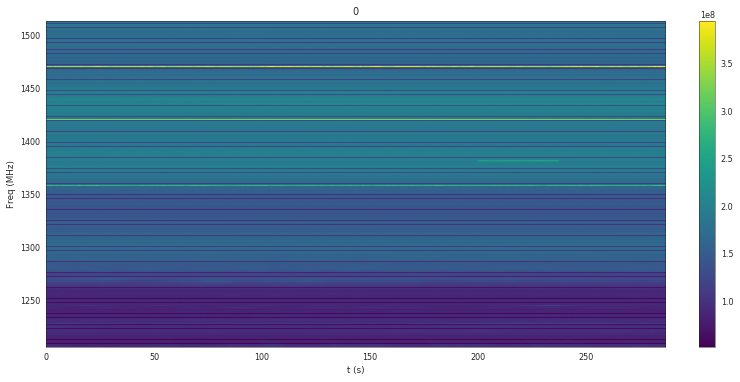

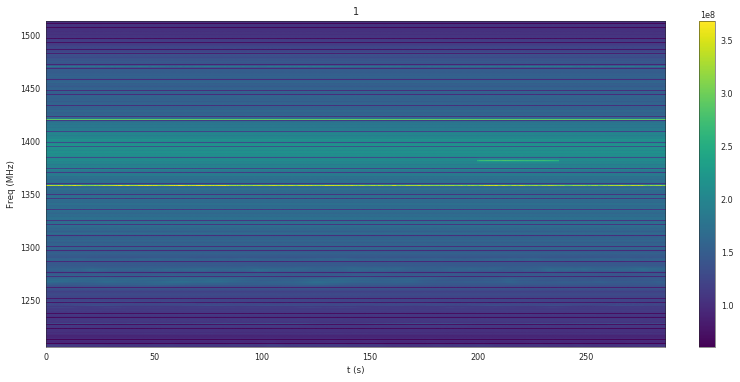

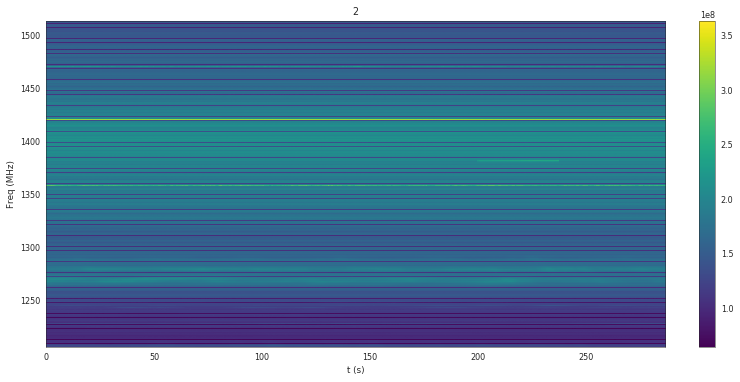

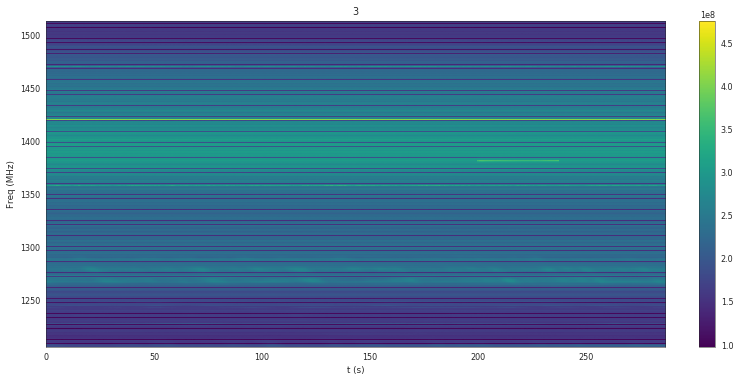

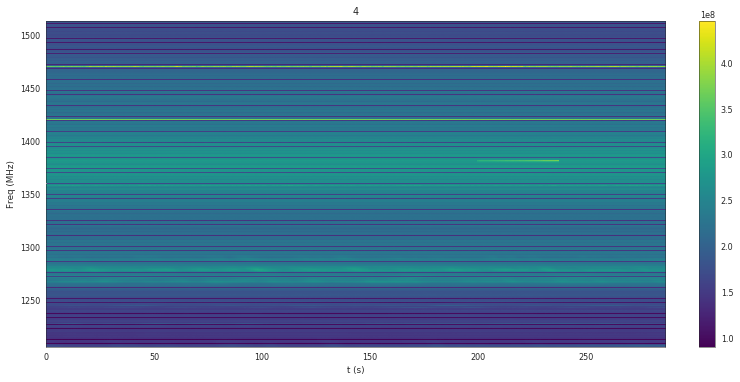

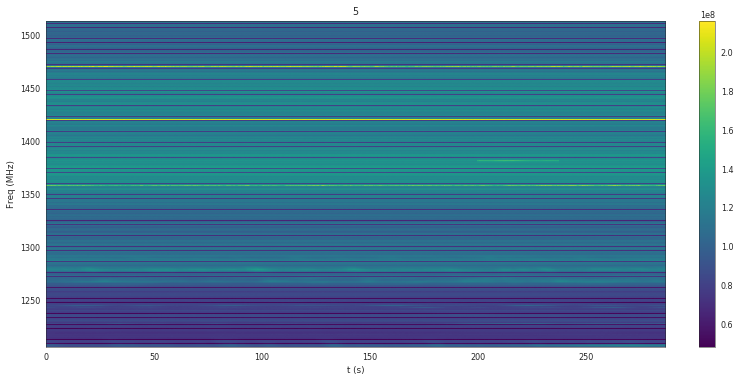

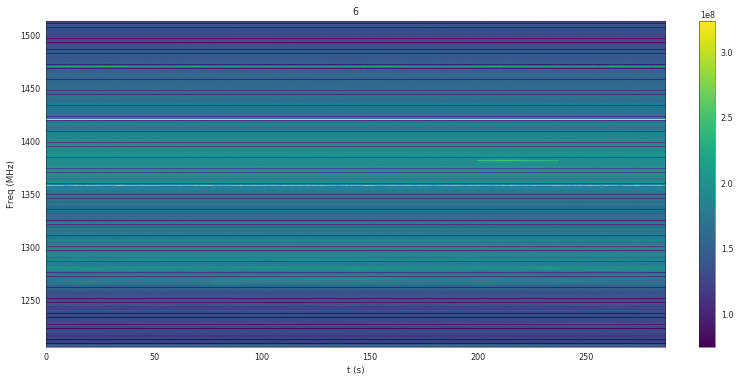

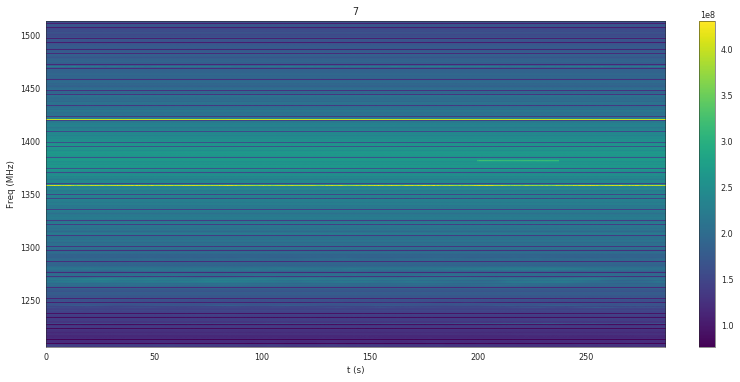

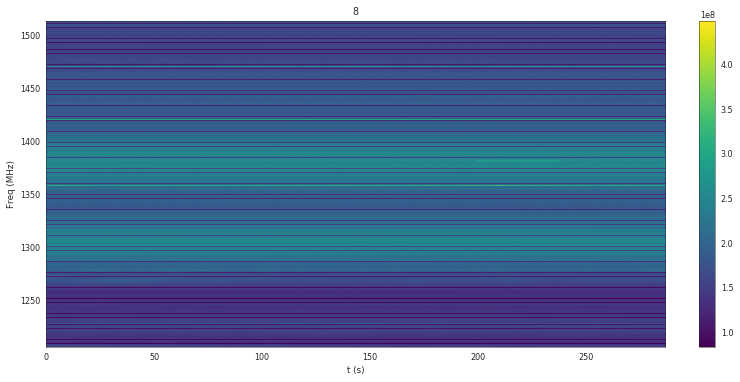

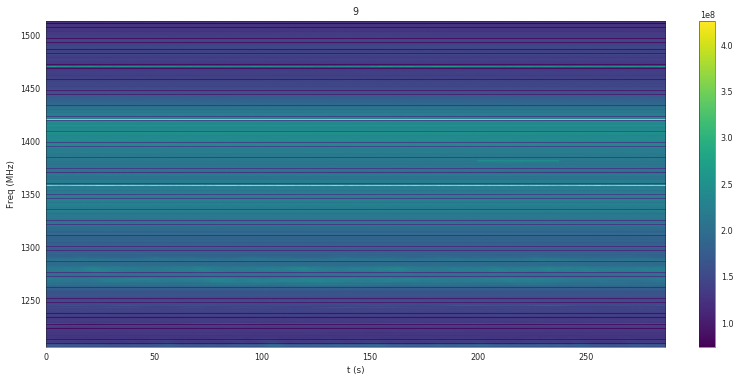

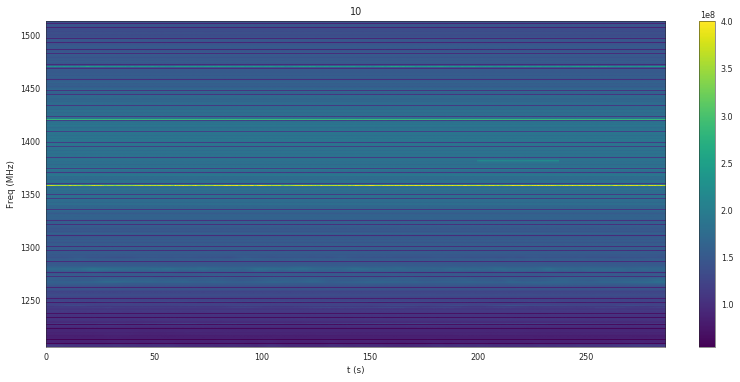

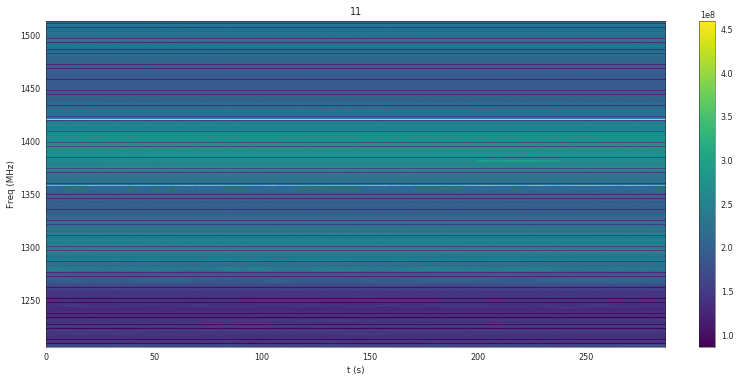

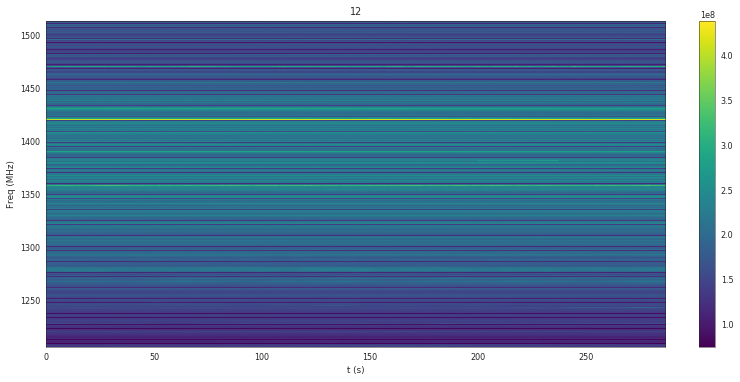

In [5]:
for bIdx in np.arange(data.shape[1]):
    
    cmap = 'viridis'

    fig = plt.figure(figsize=(12,6)) # (width, height)

    plt.imshow(data[:,bIdx,0,:].T, aspect='auto', extent=(0, (time[-1] - time[0]) * 86400,\
                        freqsMHz[-1], freqsMHz[0]), cmap=plt.get_cmap(cmap), interpolation='nearest')

    plt.title(bIdx)
    plt.ylabel('Freq (MHz)')
    plt.xlabel('t (s)')
    plt.colorbar(fraction=0.025)

In [6]:
deltaMJD = (time[1] - time[0])
totalMJD = (time[-1] - time[0])
deltaSec = deltaMJD * 86400.
totalSec = totalMJD * 86400.

startMJD = 58178. + (27040. / 86400.)# HARDCODE, start of file MJD
frbMJD = 58178.31549769 # HARDCODE, FRB MJD
frbTime = (frbMJD - startMJD) * 86400.
trueMJD = startMJD + (np.arange(time.shape[0]) * deltaMJD)
timeSec = np.arange(time.shape[0]) * deltaSec

219.000415807


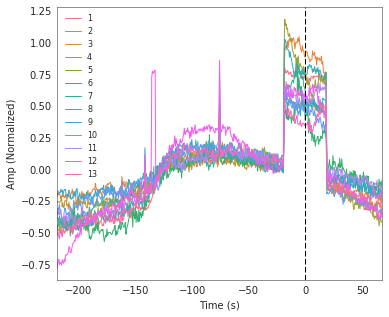

In [14]:
freqIdx = np.argwhere((freqsMHz > 1350.) & (freqsMHz < 1460.))[:,0]

sns.set_palette(sns.color_palette("husl", 13))
#fig = plt.figure(figsize=(10,6)) # (width, height)
fig = plt.figure(figsize=(5.5,4.5)) # (width, height)
ax = fig.add_subplot(111)

# 58178.31549769

for bIdx in np.arange(data.shape[1]):
    
    subData = np.mean(data[:,bIdx,0,freqIdx], axis=1)
    subData -= np.median(subData)
    subData /= 1000000.
    #subData *= -1.
    #plt.plot(time, subData, label=bIdx+1)
    #plt.plot(trueMJD, subData, label=bIdx+1)
    plt.plot(timeSec-frbTime, subData, label=bIdx+1)

print frbTime
#plt.axvline(frbMJD, ls='--', color='k')  
#plt.axvline(frbTime, ls='--', color='k')  
plt.axvline(0., ls='--', color='k')  

plt.ylabel('Amp (Normalized)', fontsize=10)
plt.xlabel('Time (s)', fontsize=10)
#plt.xlabel('Time (MJD)')
#plt.xlim(time[0], time[-1])
#plt.xlim(trueMJD[0], trueMJD[-1])
plt.xlim(timeSec[0]-frbTime, timeSec[-1]-frbTime)
plt.legend(fontsize=8)
ax.tick_params(labelsize=10)

plt.tight_layout()
plt.savefig('med_res_timeseries.pdf')

In [8]:
nSpectra = 40
print data.shape
subData = data.reshape((12,40,13,4,1408))
print subData.shape
spectras = np.mean(subData[:,:,:,0,freqIdx], axis=1)
print spectras.shape

(480, 13, 4, 1408)
(12, 40, 13, 4, 1408)
(12, 13, 503)


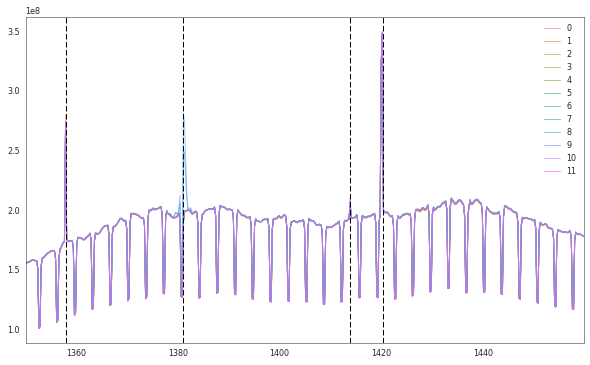

In [9]:
sns.set_palette(sns.color_palette("husl", 13))

#for bIdx in np.arange(13):
for bIdx in np.arange(1):
    
    fig = plt.figure(figsize=(10,6)) # (width, height)
    
    for sIdx in np.arange(12):
        plt.plot(freqsMHz[freqIdx], spectras[sIdx,bIdx,:], label=sIdx, alpha=0.6)
        
    plt.axvline(1358., ls='--', c='k')
    plt.axvline(1381., ls='--', c='k')
    plt.axvline(1413.8, ls='--', c='k')
    plt.axvline(1420.4, ls='--', c='k')
    plt.xlim(freqsMHz[freqIdx][-1], freqsMHz[freqIdx][0])
    
    plt.legend()